---
# 고객 성향 그룹 클러스터링_모델링
---

## 데이터 불러오기

In [1]:
import pandas as pd
df_raw = pd.read_csv('./data/03.머신러닝_02클러스터링_전처리_전처리완료본.csv',index_col=0,encoding='cp949')
df_raw

,userID,user_skintype,user_trouble,main_prd_ingredients,prd_name
0,F0002,건성,민감성/아토피,"병풀잎수, 메틸글루세스-20, 폴리글리세린-3, 병풀추출물, 무화과추출물, 다시마추...","아임쏘리포마이스킨 릴렉싱 앰플, 에이클리어 스팟 포 페이스 세럼, 1025 독도 토..."
1,F0003,복합성,주름/탄력,"스쿠알란, 하이드롤라이즈드효모추출물, 하이드록시에틸아크릴레이트/소듐아크릴로일다이메틸...","하이드라메모리 세럼, 멀티-펩타이드 + 카퍼 펩타이즈 1% 세럼, 크림스킨, 포 맨..."
2,F0004,중성,잡티/미백/홍조/다크서클,"사과수, 글라이콜릭애씨드, 나이아신아마이드, 소듐하이드록사이드, 판테놀, 소듐하이알...","아하 7 화이트헤드 파워 리퀴드, 레티놀 흔적 리페어 앰플, 1번 진정 맑게담은 청..."
3,F0005,건성,각질,"글리세레스-26, 나이아신아마이드, 아크릴레이트/C10-30알킬아크릴레이트크로스폴리...","파이브 플라워 다크스팟 클리어링 세럼, 브링그린 토닝비타20%빛세럼25mL, 화이트..."
4,F0006,중성,트러블,"달팽이점액여과물, 나이아신아마이드, 판테놀, 자이모모나스발효추출물, 꿀추출물, 하이...","로얄 블랙 스네일 퍼스트 에센스, 모링가 타이트닝 포어 세럼, 레드수딩 시카 밸런스..."
...,...,...,...,...,...
9994,M9986,민감성,각질,"약모밀추출물, 병풀추출물, 케이프알로에잎추출물, 나이아신아마이드, 엑토인, 알란토인...","레드블레미쉬 클리어 수딩 액티브 에센스, 뮤제너 피토 수딩 앰플 대용량 기획, 다이..."
9995,M9991,지성,트러블,"아세틸헥사펩타이드-8, 트라이소듐에틸렌다이아민다이석시네이트, 젤란검, 소듐클로라이드...","솔루션 10%, 레티놀 0.5% 인 스쿠알란, 1025 독도 토너, 레드 블레미쉬 ..."
9996,M9992,민감성,잡티/미백/홍조/다크서클,"해수, 하이드롤라이즈드하이알루로닉애씨드, 하이드롤라이즈드콜라겐, 판테놀, 아이리쉬모...","라운드랩 1025 독도 앰플 45g, 온리 포 맨 올인원에센스, 더모이스처 배리어 ..."
9997,M9993,건성,잡티/미백/홍조/다크서클,"나이아신아마이드, 베타인, 글리세레스-26, 비스-피이지-18메틸에터다이메틸실레인,...","에이지알 글루타치온 글로우 앰플, 아쿠아 이온 플라즈마 수분 앰플, 하이드라비오 토..."


# 인코딩

## user_skintype / user_trouble

In [2]:
from sklearn.preprocessing import OneHotEncoder

In [3]:
encoded = pd.get_dummies(df_raw, columns=['user_skintype'])
encoded

,userID,user_trouble,main_prd_ingredients,prd_name,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성
0,F0002,민감성/아토피,"병풀잎수, 메틸글루세스-20, 폴리글리세린-3, 병풀추출물, 무화과추출물, 다시마추...","아임쏘리포마이스킨 릴렉싱 앰플, 에이클리어 스팟 포 페이스 세럼, 1025 독도 토...",True,False,False,False,False
1,F0003,주름/탄력,"스쿠알란, 하이드롤라이즈드효모추출물, 하이드록시에틸아크릴레이트/소듐아크릴로일다이메틸...","하이드라메모리 세럼, 멀티-펩타이드 + 카퍼 펩타이즈 1% 세럼, 크림스킨, 포 맨...",False,False,True,False,False
2,F0004,잡티/미백/홍조/다크서클,"사과수, 글라이콜릭애씨드, 나이아신아마이드, 소듐하이드록사이드, 판테놀, 소듐하이알...","아하 7 화이트헤드 파워 리퀴드, 레티놀 흔적 리페어 앰플, 1번 진정 맑게담은 청...",False,False,False,True,False
3,F0005,각질,"글리세레스-26, 나이아신아마이드, 아크릴레이트/C10-30알킬아크릴레이트크로스폴리...","파이브 플라워 다크스팟 클리어링 세럼, 브링그린 토닝비타20%빛세럼25mL, 화이트...",True,False,False,False,False
4,F0006,트러블,"달팽이점액여과물, 나이아신아마이드, 판테놀, 자이모모나스발효추출물, 꿀추출물, 하이...","로얄 블랙 스네일 퍼스트 에센스, 모링가 타이트닝 포어 세럼, 레드수딩 시카 밸런스...",False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
9994,M9986,각질,"약모밀추출물, 병풀추출물, 케이프알로에잎추출물, 나이아신아마이드, 엑토인, 알란토인...","레드블레미쉬 클리어 수딩 액티브 에센스, 뮤제너 피토 수딩 앰플 대용량 기획, 다이...",False,True,False,False,False
9995,M9991,트러블,"아세틸헥사펩타이드-8, 트라이소듐에틸렌다이아민다이석시네이트, 젤란검, 소듐클로라이드...","솔루션 10%, 레티놀 0.5% 인 스쿠알란, 1025 독도 토너, 레드 블레미쉬 ...",False,False,False,False,True
9996,M9992,잡티/미백/홍조/다크서클,"해수, 하이드롤라이즈드하이알루로닉애씨드, 하이드롤라이즈드콜라겐, 판테놀, 아이리쉬모...","라운드랩 1025 독도 앰플 45g, 온리 포 맨 올인원에센스, 더모이스처 배리어 ...",False,True,False,False,False
9997,M9993,잡티/미백/홍조/다크서클,"나이아신아마이드, 베타인, 글리세레스-26, 비스-피이지-18메틸에터다이메틸실레인,...","에이지알 글루타치온 글로우 앰플, 아쿠아 이온 플라즈마 수분 앰플, 하이드라비오 토...",True,False,False,False,False


In [4]:
df_prep = pd.get_dummies(encoded,columns=['user_trouble'])
df_prep

,userID,main_prd_ingredients,prd_name,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성,user_trouble_각질,user_trouble_민감성/아토피,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,user_trouble_주름/탄력,user_trouble_트러블
0,F0002,"병풀잎수, 메틸글루세스-20, 폴리글리세린-3, 병풀추출물, 무화과추출물, 다시마추...","아임쏘리포마이스킨 릴렉싱 앰플, 에이클리어 스팟 포 페이스 세럼, 1025 독도 토...",True,False,False,False,False,False,True,False,False,False,False
1,F0003,"스쿠알란, 하이드롤라이즈드효모추출물, 하이드록시에틸아크릴레이트/소듐아크릴로일다이메틸...","하이드라메모리 세럼, 멀티-펩타이드 + 카퍼 펩타이즈 1% 세럼, 크림스킨, 포 맨...",False,False,True,False,False,False,False,False,False,True,False
2,F0004,"사과수, 글라이콜릭애씨드, 나이아신아마이드, 소듐하이드록사이드, 판테놀, 소듐하이알...","아하 7 화이트헤드 파워 리퀴드, 레티놀 흔적 리페어 앰플, 1번 진정 맑게담은 청...",False,False,False,True,False,False,False,False,True,False,False
3,F0005,"글리세레스-26, 나이아신아마이드, 아크릴레이트/C10-30알킬아크릴레이트크로스폴리...","파이브 플라워 다크스팟 클리어링 세럼, 브링그린 토닝비타20%빛세럼25mL, 화이트...",True,False,False,False,False,True,False,False,False,False,False
4,F0006,"달팽이점액여과물, 나이아신아마이드, 판테놀, 자이모모나스발효추출물, 꿀추출물, 하이...","로얄 블랙 스네일 퍼스트 에센스, 모링가 타이트닝 포어 세럼, 레드수딩 시카 밸런스...",False,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,M9986,"약모밀추출물, 병풀추출물, 케이프알로에잎추출물, 나이아신아마이드, 엑토인, 알란토인...","레드블레미쉬 클리어 수딩 액티브 에센스, 뮤제너 피토 수딩 앰플 대용량 기획, 다이...",False,True,False,False,False,True,False,False,False,False,False
9995,M9991,"아세틸헥사펩타이드-8, 트라이소듐에틸렌다이아민다이석시네이트, 젤란검, 소듐클로라이드...","솔루션 10%, 레티놀 0.5% 인 스쿠알란, 1025 독도 토너, 레드 블레미쉬 ...",False,False,False,False,True,False,False,False,False,False,True
9996,M9992,"해수, 하이드롤라이즈드하이알루로닉애씨드, 하이드롤라이즈드콜라겐, 판테놀, 아이리쉬모...","라운드랩 1025 독도 앰플 45g, 온리 포 맨 올인원에센스, 더모이스처 배리어 ...",False,True,False,False,False,False,False,False,True,False,False
9997,M9993,"나이아신아마이드, 베타인, 글리세레스-26, 비스-피이지-18메틸에터다이메틸실레인,...","에이지알 글루타치온 글로우 앰플, 아쿠아 이온 플라즈마 수분 앰플, 하이드라비오 토...",True,False,False,False,False,False,False,False,True,False,False


In [5]:
df_prep[['user_skintype_건성',
       'user_skintype_민감성', 'user_skintype_복합성', 'user_skintype_중성',
       'user_skintype_지성', 'user_trouble_각질', 'user_trouble_민감성/아토피',
       'user_trouble_블랙헤드/모공', 'user_trouble_잡티/미백/홍조/다크서클',
       'user_trouble_주름/탄력', 'user_trouble_트러블']] = df_prep[['user_skintype_건성',
       'user_skintype_민감성', 'user_skintype_복합성', 'user_skintype_중성',
       'user_skintype_지성', 'user_trouble_각질', 'user_trouble_민감성/아토피',
       'user_trouble_블랙헤드/모공', 'user_trouble_잡티/미백/홍조/다크서클',
       'user_trouble_주름/탄력', 'user_trouble_트러블']].astype(int)
       
df_prep


,userID,main_prd_ingredients,prd_name,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성,user_trouble_각질,user_trouble_민감성/아토피,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,user_trouble_주름/탄력,user_trouble_트러블
0,F0002,"병풀잎수, 메틸글루세스-20, 폴리글리세린-3, 병풀추출물, 무화과추출물, 다시마추...","아임쏘리포마이스킨 릴렉싱 앰플, 에이클리어 스팟 포 페이스 세럼, 1025 독도 토...",1,0,0,0,0,0,1,0,0,0,0
1,F0003,"스쿠알란, 하이드롤라이즈드효모추출물, 하이드록시에틸아크릴레이트/소듐아크릴로일다이메틸...","하이드라메모리 세럼, 멀티-펩타이드 + 카퍼 펩타이즈 1% 세럼, 크림스킨, 포 맨...",0,0,1,0,0,0,0,0,0,1,0
2,F0004,"사과수, 글라이콜릭애씨드, 나이아신아마이드, 소듐하이드록사이드, 판테놀, 소듐하이알...","아하 7 화이트헤드 파워 리퀴드, 레티놀 흔적 리페어 앰플, 1번 진정 맑게담은 청...",0,0,0,1,0,0,0,0,1,0,0
3,F0005,"글리세레스-26, 나이아신아마이드, 아크릴레이트/C10-30알킬아크릴레이트크로스폴리...","파이브 플라워 다크스팟 클리어링 세럼, 브링그린 토닝비타20%빛세럼25mL, 화이트...",1,0,0,0,0,1,0,0,0,0,0
4,F0006,"달팽이점액여과물, 나이아신아마이드, 판테놀, 자이모모나스발효추출물, 꿀추출물, 하이...","로얄 블랙 스네일 퍼스트 에센스, 모링가 타이트닝 포어 세럼, 레드수딩 시카 밸런스...",0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,M9986,"약모밀추출물, 병풀추출물, 케이프알로에잎추출물, 나이아신아마이드, 엑토인, 알란토인...","레드블레미쉬 클리어 수딩 액티브 에센스, 뮤제너 피토 수딩 앰플 대용량 기획, 다이...",0,1,0,0,0,1,0,0,0,0,0
9995,M9991,"아세틸헥사펩타이드-8, 트라이소듐에틸렌다이아민다이석시네이트, 젤란검, 소듐클로라이드...","솔루션 10%, 레티놀 0.5% 인 스쿠알란, 1025 독도 토너, 레드 블레미쉬 ...",0,0,0,0,1,0,0,0,0,0,1
9996,M9992,"해수, 하이드롤라이즈드하이알루로닉애씨드, 하이드롤라이즈드콜라겐, 판테놀, 아이리쉬모...","라운드랩 1025 독도 앰플 45g, 온리 포 맨 올인원에센스, 더모이스처 배리어 ...",0,1,0,0,0,0,0,0,1,0,0
9997,M9993,"나이아신아마이드, 베타인, 글리세레스-26, 비스-피이지-18메틸에터다이메틸실레인,...","에이지알 글루타치온 글로우 앰플, 아쿠아 이온 플라즈마 수분 앰플, 하이드라비오 토...",1,0,0,0,0,0,0,0,1,0,0


In [6]:
df_prep

,userID,main_prd_ingredients,prd_name,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성,user_trouble_각질,user_trouble_민감성/아토피,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,user_trouble_주름/탄력,user_trouble_트러블
0,F0002,"병풀잎수, 메틸글루세스-20, 폴리글리세린-3, 병풀추출물, 무화과추출물, 다시마추...","아임쏘리포마이스킨 릴렉싱 앰플, 에이클리어 스팟 포 페이스 세럼, 1025 독도 토...",1,0,0,0,0,0,1,0,0,0,0
1,F0003,"스쿠알란, 하이드롤라이즈드효모추출물, 하이드록시에틸아크릴레이트/소듐아크릴로일다이메틸...","하이드라메모리 세럼, 멀티-펩타이드 + 카퍼 펩타이즈 1% 세럼, 크림스킨, 포 맨...",0,0,1,0,0,0,0,0,0,1,0
2,F0004,"사과수, 글라이콜릭애씨드, 나이아신아마이드, 소듐하이드록사이드, 판테놀, 소듐하이알...","아하 7 화이트헤드 파워 리퀴드, 레티놀 흔적 리페어 앰플, 1번 진정 맑게담은 청...",0,0,0,1,0,0,0,0,1,0,0
3,F0005,"글리세레스-26, 나이아신아마이드, 아크릴레이트/C10-30알킬아크릴레이트크로스폴리...","파이브 플라워 다크스팟 클리어링 세럼, 브링그린 토닝비타20%빛세럼25mL, 화이트...",1,0,0,0,0,1,0,0,0,0,0
4,F0006,"달팽이점액여과물, 나이아신아마이드, 판테놀, 자이모모나스발효추출물, 꿀추출물, 하이...","로얄 블랙 스네일 퍼스트 에센스, 모링가 타이트닝 포어 세럼, 레드수딩 시카 밸런스...",0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,M9986,"약모밀추출물, 병풀추출물, 케이프알로에잎추출물, 나이아신아마이드, 엑토인, 알란토인...","레드블레미쉬 클리어 수딩 액티브 에센스, 뮤제너 피토 수딩 앰플 대용량 기획, 다이...",0,1,0,0,0,1,0,0,0,0,0
9995,M9991,"아세틸헥사펩타이드-8, 트라이소듐에틸렌다이아민다이석시네이트, 젤란검, 소듐클로라이드...","솔루션 10%, 레티놀 0.5% 인 스쿠알란, 1025 독도 토너, 레드 블레미쉬 ...",0,0,0,0,1,0,0,0,0,0,1
9996,M9992,"해수, 하이드롤라이즈드하이알루로닉애씨드, 하이드롤라이즈드콜라겐, 판테놀, 아이리쉬모...","라운드랩 1025 독도 앰플 45g, 온리 포 맨 올인원에센스, 더모이스처 배리어 ...",0,1,0,0,0,0,0,0,1,0,0
9997,M9993,"나이아신아마이드, 베타인, 글리세레스-26, 비스-피이지-18메틸에터다이메틸실레인,...","에이지알 글루타치온 글로우 앰플, 아쿠아 이온 플라즈마 수분 앰플, 하이드라비오 토...",1,0,0,0,0,0,0,0,1,0,0


## one-hot encoding : user_ingredients

In [7]:
# flattened_ingredients = []
# for ingredients in df_prep['user_ingredients']:
#     # print(ingredients)
#     flattened_ingredients.append(ingredients)
# flattened_ingredients

In [8]:
# flattened_ingredients[0]

### 1차 시도

In [9]:
# from collections import Counter

# # Example list of lists (with duplicates)
# # list_of_lists = [['apple', 'banana', 'apple'], ['banana', 'cherry'], ['apple', 'cherry', 'cherry', 'banana']]

# # Flatten the list and count occurrences
# flattened_list = [item for sublist in flattened_ingredients for item in sublist]
# category_counts = Counter(flattened_list)

# # Unique categories
# unique_categories = list(category_counts.keys())

# # Create count encoded vectors
# encoded_vectors = []
# for sublist in flattened_ingredients:
#     sublist_count = Counter(sublist)
#     encoded_vector = [sublist_count.get(category, 0) for category in unique_categories]
#     encoded_vectors.append(encoded_vector)

# # Displaying the result
# for sublist, vector in zip(flattened_ingredients, encoded_vectors):
#     print(f"List: {sublist} -> Encoded: {vector}")


### 2차 시도: 성공

In [11]:
import pandas as pd

# Create a dictionary to hold ingredient counts for each row
ingredient_counts = {idx: {} for idx in range(len(df_prep))}

# Populate the dictionary with counts
for idx, ingredients in enumerate(df_prep['main_prd_ingredients']):
    for ingredient in ingredients.split(", "):
        if ingredient in ingredient_counts[idx]:
            ingredient_counts[idx][ingredient] += 1
        else:
            ingredient_counts[idx][ingredient] = 1

# Convert the dictionary to a DataFrame
ingredients_df = pd.DataFrame.from_dict(ingredient_counts, orient='index')

# Fill NaN values with 0s (for ingredients that did not appear in some rows)
ingredients_df.fillna(0, inplace=True)

# Ensure that all counts are integers
ingredients_df = ingredients_df.astype(int)

# Join with the original DataFrame
df_prep = pd.concat([df_prep, ingredients_df], axis=1)


In [12]:
df_prep = df_prep.drop("",axis=1)
df_prep

,userID,main_prd_ingredients,prd_name,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성,user_trouble_각질,user_trouble_민감성/아토피,...,글리세릴이소스테아레이트,에스에이치-올리 고펩타이드-1,로우스 위트블루베리추출물,솔비탄세스퀴올리에이 트,피이지-60 하이드로제네이티드캐스터오일,클로페네 신,마누카잎추출물,트라이펩타이드-3,아세틸옥타펩타이드-3,트라이펩타이드-2
0,F0002,"병풀잎수, 메틸글루세스-20, 폴리글리세린-3, 병풀추출물, 무화과추출물, 다시마추...","아임쏘리포마이스킨 릴렉싱 앰플, 에이클리어 스팟 포 페이스 세럼, 1025 독도 토...",1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,F0003,"스쿠알란, 하이드롤라이즈드효모추출물, 하이드록시에틸아크릴레이트/소듐아크릴로일다이메틸...","하이드라메모리 세럼, 멀티-펩타이드 + 카퍼 펩타이즈 1% 세럼, 크림스킨, 포 맨...",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,F0004,"사과수, 글라이콜릭애씨드, 나이아신아마이드, 소듐하이드록사이드, 판테놀, 소듐하이알...","아하 7 화이트헤드 파워 리퀴드, 레티놀 흔적 리페어 앰플, 1번 진정 맑게담은 청...",0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,F0005,"글리세레스-26, 나이아신아마이드, 아크릴레이트/C10-30알킬아크릴레이트크로스폴리...","파이브 플라워 다크스팟 클리어링 세럼, 브링그린 토닝비타20%빛세럼25mL, 화이트...",1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,F0006,"달팽이점액여과물, 나이아신아마이드, 판테놀, 자이모모나스발효추출물, 꿀추출물, 하이...","로얄 블랙 스네일 퍼스트 에센스, 모링가 타이트닝 포어 세럼, 레드수딩 시카 밸런스...",0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,M9986,"약모밀추출물, 병풀추출물, 케이프알로에잎추출물, 나이아신아마이드, 엑토인, 알란토인...","레드블레미쉬 클리어 수딩 액티브 에센스, 뮤제너 피토 수딩 앰플 대용량 기획, 다이...",0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9995,M9991,"아세틸헥사펩타이드-8, 트라이소듐에틸렌다이아민다이석시네이트, 젤란검, 소듐클로라이드...","솔루션 10%, 레티놀 0.5% 인 스쿠알란, 1025 독도 토너, 레드 블레미쉬 ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,M9992,"해수, 하이드롤라이즈드하이알루로닉애씨드, 하이드롤라이즈드콜라겐, 판테놀, 아이리쉬모...","라운드랩 1025 독도 앰플 45g, 온리 포 맨 올인원에센스, 더모이스처 배리어 ...",0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,M9993,"나이아신아마이드, 베타인, 글리세레스-26, 비스-피이지-18메틸에터다이메틸실레인,...","에이지알 글루타치온 글로우 앰플, 아쿠아 이온 플라즈마 수분 앰플, 하이드라비오 토...",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_prep['main_prd_ingredients'][0]

'병풀잎수, 메틸글루세스-20, 폴리글리세린-3, 병풀추출물, 무화과추출물, 다시마추출물, 한련초잎추출물, 버지니아풍년화추출물, 티트리잎추출물, 약모밀추출물, 국화추출물, 연꽃꽃추출물, 라벤더꽃추출물, 마돈나백합꽃추출물, 서양수수꽃다리추출물, 장미꽃추출물, 녹차수, 베르가모트오일, 하이드로제네이티드레시틴, C12-14파레스-12, 알란토인, 마트리카리아꽃수, 잔탄검, 프룩토올리고사카라이드, 베타-글루칸, 하이드롤라이즈드하이알루로닉애씨드, 세라마이드엔피, 카보머, 팔미토일펜타펩타이드-4, 에틸헥실글리세린, 리날룰, 나이아신아마이드, 락토바실러스발효물, 암모늄폴리아크릴로일다이메틸타우레이트, 판테놀, 석시닉애씨드, 트로메타민, 다이포타슘글리시리제이트, 알란토인, 스테비아잎/줄기추출물, 다이소듐이디티에이, 덱스트린, 카카오씨추출물, 병풀추출물, 약모밀추출물, 워터민트추출물, 애플민트잎추출물, 스피어민트추출물, 아시아틱애씨드, 아시아티코사이드, 마데카식애씨드, 마데카소사이드, 흰버드나무껍질추출물, 아이리쉬모스추출물, 사탕수수추출물, 해수, 프로테아제, 베타인, 판테놀, 에틸헥실글리세린, 알란토인, 잔탄검, 다이소듐이디티에이, 아벤느온천수, 글리세린, 카프릴릭/카프릭트리글리세라이드, 이소프로필팔미테이트, 프로필렌글라이콜디카프레이트, 글리세릴스테아레이트, 피이지-100스테아레이트, 미레스-3미리스테이트, 토코페릴아세테이트, 달맞이꽃오일, 카프릴릴글라이콜, 글라이신, 펜틸람노사이드, 아크릴레이트/C10-30알킬아크릴레이트크로스폴리머, 카보머, 페닐트라이메티콘, 트레할로오스, 다이카프릴릴카보네이트, 암모늄아크릴로일다이메틸타우레이트/브이피코폴리머, 하이드로제네이티드레시틴, 하이드로제네이티드폴리아이소부텐, 하이드록시에틸아크릴레이트/소듐아크릴로일다이메틸타우레이트코폴리머, 세테아릴알코올, 아크릴레이트/C10-30알킬아크릴레이트크로스폴리머, 글리세릴카프릴레이트, 글리세릴스테아레이트, 트로메타민, 다이소듐이디티에이, 에틸헥실글리세린, 스테아릭애씨드, 팔미틱애씨드, 폴리글리세릴-3메틸글루

# 정규화

In [14]:
df_ingredients = df_prep[df_prep.columns[7:]]
df_ingredients

,user_skintype_지성,user_trouble_각질,user_trouble_민감성/아토피,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,user_trouble_주름/탄력,user_trouble_트러블,병풀잎수,메틸글루세스-20,폴리글리세린-3,...,글리세릴이소스테아레이트,에스에이치-올리 고펩타이드-1,로우스 위트블루베리추출물,솔비탄세스퀴올리에이 트,피이지-60 하이드로제네이티드캐스터오일,클로페네 신,마누카잎추출물,트라이펩타이드-3,아세틸옥타펩타이드-3,트라이펩타이드-2
0,0,0,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_describe = df_ingredients.describe()
df_describe.loc['max'].unique()

array([1., 3., 2., 5., 4.])

In [16]:
print(df_prep.columns)
df_scale = df_prep.copy()
df_scale = df_scale.drop(['prd_name','main_prd_ingredients'],axis=1)
print(df_scale.columns)

Index(['userID', 'main_prd_ingredients', 'prd_name', 'user_skintype_건성',
       'user_skintype_민감성', 'user_skintype_복합성', 'user_skintype_중성',
       'user_skintype_지성', 'user_trouble_각질', 'user_trouble_민감성/아토피',
       ...
       '글리세릴이소스테아레이트', '에스에이치-올리 고펩타이드-1', '로우스 위트블루베리추출물', '솔비탄세스퀴올리에이 트',
       '피이지-60 하이드로제네이티드캐스터오일', '클로페네 신', '마누카잎추출물', '트라이펩타이드-3',
       '아세틸옥타펩타이드-3', '트라이펩타이드-2'],
      dtype='object', length=1759)
Index(['userID', 'user_skintype_건성', 'user_skintype_민감성', 'user_skintype_복합성',
       'user_skintype_중성', 'user_skintype_지성', 'user_trouble_각질',
       'user_trouble_민감성/아토피', 'user_trouble_블랙헤드/모공',
       'user_trouble_잡티/미백/홍조/다크서클',
       ...
       '글리세릴이소스테아레이트', '에스에이치-올리 고펩타이드-1', '로우스 위트블루베리추출물', '솔비탄세스퀴올리에이 트',
       '피이지-60 하이드로제네이티드캐스터오일', '클로페네 신', '마누카잎추출물', '트라이펩타이드-3',
       '아세틸옥타펩타이드-3', '트라이펩타이드-2'],
      dtype='object', length=1757)


In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# min_sc = MinMaxScaler()
# df_scale[df_scale.columns[1:]] = min_sc.fit_transform(df_scale[df_scale.columns[1:]])
   
std_sc = StandardScaler()
df_scale[df_scale.columns[1:]] = std_sc.fit_transform(df_scale[df_scale.columns[1:]])


In [18]:
df_target = df_scale[df_scale.columns[1:]]
df_target

,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성,user_trouble_각질,user_trouble_민감성/아토피,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,user_trouble_주름/탄력,...,글리세릴이소스테아레이트,에스에이치-올리 고펩타이드-1,로우스 위트블루베리추출물,솔비탄세스퀴올리에이 트,피이지-60 하이드로제네이티드캐스터오일,클로페네 신,마누카잎추출물,트라이펩타이드-3,아세틸옥타펩타이드-3,트라이펩타이드-2
0,2.021376,-0.494086,-0.496748,-0.507054,-0.507365,-0.446972,2.228450,-0.448582,-0.451153,-0.445361,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566
1,-0.494712,-0.494086,2.013095,-0.507054,-0.507365,-0.446972,-0.448742,-0.448582,-0.451153,2.245371,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566
2,-0.494712,-0.494086,-0.496748,1.972178,-0.507365,-0.446972,-0.448742,-0.448582,2.216544,-0.445361,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566
3,2.021376,-0.494086,-0.496748,-0.507054,-0.507365,2.237276,-0.448742,-0.448582,-0.451153,-0.445361,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566
4,-0.494712,-0.494086,-0.496748,1.972178,-0.507365,-0.446972,-0.448742,-0.448582,-0.451153,-0.445361,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-0.494712,2.023939,-0.496748,-0.507054,-0.507365,2.237276,-0.448742,-0.448582,-0.451153,-0.445361,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566
9995,-0.494712,-0.494086,-0.496748,-0.507054,1.970967,-0.446972,-0.448742,-0.448582,-0.451153,-0.445361,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566
9996,-0.494712,2.023939,-0.496748,-0.507054,-0.507365,-0.446972,-0.448742,-0.448582,2.216544,-0.445361,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566
9997,2.021376,-0.494086,-0.496748,-0.507054,-0.507365,-0.446972,-0.448742,-0.448582,2.216544,-0.445361,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566


In [19]:
df_target.describe()

,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성,user_trouble_각질,user_trouble_민감성/아토피,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,user_trouble_주름/탄력,...,글리세릴이소스테아레이트,에스에이치-올리 고펩타이드-1,로우스 위트블루베리추출물,솔비탄세스퀴올리에이 트,피이지-60 하이드로제네이티드캐스터오일,클로페네 신,마누카잎추출물,트라이펩타이드-3,아세틸옥타펩타이드-3,트라이펩타이드-2
count,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,...,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03
mean,-1.989719e-17,-4.334744e-17,-3.020109e-17,2.167372e-17,4.547928e-17,-3.339885e-17,1.563350e-17,-1.634412e-17,-1.090792e-16,-2.931282e-17,...,4.903235e-17,-2.309495e-17,-2.309495e-17,-2.309495e-17,-2.309495e-17,-2.309495e-17,-2.842455e-17,2.025249e-17,2.025249e-17,2.025249e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,...,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-4.947125e-01,-4.940860e-01,-4.967475e-01,-5.070536e-01,-5.073653e-01,-4.469721e-01,-4.487424e-01,-4.485815e-01,-4.511527e-01,-4.453607e-01,...,-8.026127e-02,-8.335851e-02,-8.335851e-02,-8.335851e-02,-8.335851e-02,-8.335851e-02,-7.638340e-02,-8.456649e-02,-8.456649e-02,-8.456649e-02
25%,-4.947125e-01,-4.940860e-01,-4.967475e-01,-5.070536e-01,-5.073653e-01,-4.469721e-01,-4.487424e-01,-4.485815e-01,-4.511527e-01,-4.453607e-01,...,-8.026127e-02,-8.335851e-02,-8.335851e-02,-8.335851e-02,-8.335851e-02,-8.335851e-02,-7.638340e-02,-8.456649e-02,-8.456649e-02,-8.456649e-02
50%,-4.947125e-01,-4.940860e-01,-4.967475e-01,-5.070536e-01,-5.073653e-01,-4.469721e-01,-4.487424e-01,-4.485815e-01,-4.511527e-01,-4.453607e-01,...,-8.026127e-02,-8.335851e-02,-8.335851e-02,-8.335851e-02,-8.335851e-02,-8.335851e-02,-7.638340e-02,-8.456649e-02,-8.456649e-02,-8.456649e-02
75%,-4.947125e-01,-4.940860e-01,-4.967475e-01,-5.070536e-01,-5.073653e-01,-4.469721e-01,-4.487424e-01,-4.485815e-01,-4.511527e-01,-4.453607e-01,...,-8.026127e-02,-8.335851e-02,-8.335851e-02,-8.335851e-02,-8.335851e-02,-8.335851e-02,-7.638340e-02,-8.456649e-02,-8.456649e-02,-8.456649e-02
max,2.021376e+00,2.023939e+00,2.013095e+00,1.972178e+00,1.970967e+00,2.237276e+00,2.228450e+00,2.229249e+00,2.216544e+00,2.245371e+00,...,1.245931e+01,1.199638e+01,1.199638e+01,1.199638e+01,1.199638e+01,1.199638e+01,1.309185e+01,1.182502e+01,1.182502e+01,1.182502e+01


# 모델학습

In [20]:
from sklearn.cluster import DBSCAN

## 1.DBSCAN 기본으로 돌려보기

In [21]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df_target)

labels = dbscan.labels_
core_samples = np.zeros_like(labels, dtype=bool)
core_samples[dbscan.core_sample_indices_] = True

## 2.추가 전처리 : PCA

### 임의의 숫자로 압축해보고 분산 비율 기준을 정해 요소 추출

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 임의로 압축 성분 개수 정해서 돌리기
pca = PCA(n_components=1695)
printcipalComponents = pca.fit_transform(df_target)
principalDf = pd.DataFrame(data=printcipalComponents)

In [23]:
# 설명된 분산의 비율 0.005 이상인 요소 개수 추출
filtered_variances = pca.explained_variance_ratio_[pca.explained_variance_ratio_ > 0.005]

print(len(filtered_variances))
print(filtered_variances)

60
[0.02418668 0.02024021 0.01499273 0.01429344 0.01378571 0.01295814
 0.01215836 0.01168273 0.01127124 0.01053105 0.01017492 0.00964285
 0.0095305  0.00940164 0.00899036 0.00897617 0.00876478 0.0085939
 0.00841703 0.0083891  0.008277   0.00818354 0.00801623 0.00790252
 0.00788797 0.00781335 0.00768912 0.00753956 0.00744022 0.0074248
 0.00730462 0.00715829 0.00710013 0.00702727 0.00697346 0.00686802
 0.00664571 0.00663111 0.00659684 0.00654228 0.00646178 0.00634189
 0.00616649 0.0061306  0.0061119  0.00598462 0.00593327 0.00576383
 0.00571284 0.0056113  0.00552619 0.00544434 0.00536967 0.00533256
 0.00525175 0.00520525 0.00514233 0.00507981 0.00503183 0.005019  ]


### 분산 비율 기준 이상인 성분의 개수로 다시 압축

In [24]:
# test
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=58)  # n_components의 개수를 위에서 나온 Filtered_variances의 개수로 설정
principalComponents = pca.fit(df_target)
components = pca.components_
principalComponents = pca.transform(df_target)

principalDf = pd.DataFrame(data=principalComponents)
principalDf

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,-1.346749,-0.185904,-0.604006,0.010560,-0.311134,-0.094626,2.074217,-2.057840,1.294409,-2.060786,...,-3.141836,1.118892,3.269977,-0.825461,-4.421868,2.548283,-1.668757,-2.827967,-2.004543,2.151951
1,-1.137779,-1.392578,-1.403061,-0.132196,-0.637336,3.797953,2.936406,-2.245157,-0.828052,-0.243806,...,-0.097779,-1.716671,-2.245709,-3.173651,-2.397256,2.473618,-0.677651,2.827676,1.367120,-4.816120
2,-1.353883,-2.045615,-1.860410,-1.255078,0.096402,-2.949840,0.782923,-0.829524,1.173788,-1.413733,...,1.195705,4.675703,-4.458096,-1.167948,-3.417087,-4.086006,-1.615301,4.348298,1.030531,2.723728
3,-1.430483,-0.933885,-1.465587,0.417136,-0.600161,1.257632,-2.452069,0.258912,2.231013,0.106518,...,4.329084,1.444600,-0.345527,1.155519,5.333641,-1.328350,-1.101952,0.165571,-3.307261,-2.663190
4,-1.291658,-1.876996,-1.577260,-0.379785,-0.402013,-0.202876,0.547843,-0.100796,1.626955,-2.536285,...,-3.290198,-0.716317,1.095582,-0.808327,-0.991510,-0.736366,2.649601,5.036961,2.999531,-3.768362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-1.534808,-0.575741,-1.626363,-1.365633,0.150641,-3.907849,1.842315,-7.323517,-10.151825,8.164593,...,1.581312,-0.057629,0.771311,-1.107510,-0.656537,-1.431391,-0.012082,-1.937903,-0.378944,0.352665
9995,-1.583978,-1.708675,-1.306246,-1.706876,0.410749,-4.421362,1.834665,-1.749948,1.188612,-0.995961,...,-0.297443,-4.559360,2.278561,1.543110,2.416380,0.024866,0.218061,-3.501410,0.521849,1.431202
9996,1.169952,-3.080646,39.472043,-32.286536,20.049459,10.356164,-4.684860,1.093991,0.558963,-1.960321,...,-10.114684,-1.768908,1.041548,7.606204,1.582496,1.691969,-1.661803,5.055942,-0.116557,0.977530
9997,-1.179443,-1.418931,-1.236786,-1.137173,-0.366159,-2.105392,-0.604884,-0.446607,1.606904,-1.818400,...,3.518998,-1.513897,4.447088,-0.628359,-1.215445,-0.151177,-2.543782,2.404011,-2.799253,-1.524836


### 해당 축소로 설명이 얼마나 되는지 확인

Text(0, 0.5, 'Explained %')

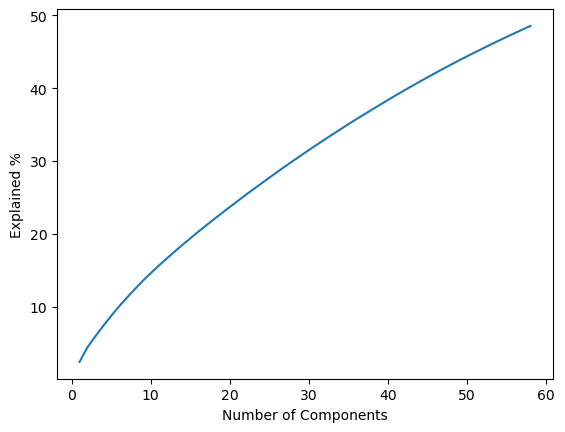

In [25]:
# test
# 설명된 분산의 백분율 : 
# 아래 X축 components의 개수에 따른 설명 가능한 값의 퍼센티지 (높아야 함)
plt.plot(np.arange(1, 58+1), np.cumsum(pca.explained_variance_ratio_) * 100)
plt.xlabel("Number of Components")
plt.ylabel("Explained %")

Text(0, 0.5, 'Explained %')

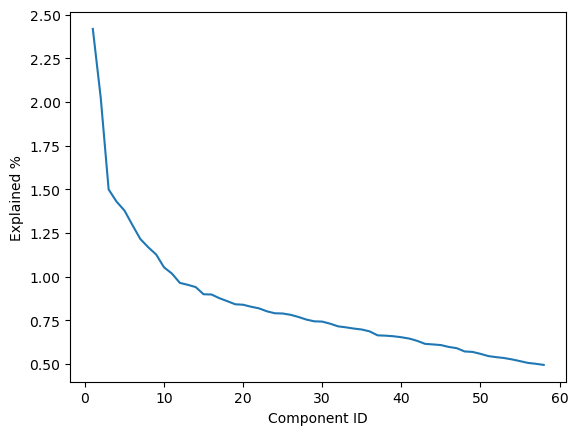

In [26]:
# 축이 데이터의 방향에 맞게 설정되어 있다면 균등하게 떨어질 것이고, 잘 설정되어 있지 않았다면 축에 떨어질때 겹치는 부분이 많음
plt.plot(np.arange(1, 58+1), pca.explained_variance_ratio_ * 100)
plt.xlabel("Component ID")
plt.ylabel("Explained %")

### PCA component 해석

In [27]:
principalDf

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,-1.346749,-0.185904,-0.604006,0.010560,-0.311134,-0.094626,2.074217,-2.057840,1.294409,-2.060786,...,-3.141836,1.118892,3.269977,-0.825461,-4.421868,2.548283,-1.668757,-2.827967,-2.004543,2.151951
1,-1.137779,-1.392578,-1.403061,-0.132196,-0.637336,3.797953,2.936406,-2.245157,-0.828052,-0.243806,...,-0.097779,-1.716671,-2.245709,-3.173651,-2.397256,2.473618,-0.677651,2.827676,1.367120,-4.816120
2,-1.353883,-2.045615,-1.860410,-1.255078,0.096402,-2.949840,0.782923,-0.829524,1.173788,-1.413733,...,1.195705,4.675703,-4.458096,-1.167948,-3.417087,-4.086006,-1.615301,4.348298,1.030531,2.723728
3,-1.430483,-0.933885,-1.465587,0.417136,-0.600161,1.257632,-2.452069,0.258912,2.231013,0.106518,...,4.329084,1.444600,-0.345527,1.155519,5.333641,-1.328350,-1.101952,0.165571,-3.307261,-2.663190
4,-1.291658,-1.876996,-1.577260,-0.379785,-0.402013,-0.202876,0.547843,-0.100796,1.626955,-2.536285,...,-3.290198,-0.716317,1.095582,-0.808327,-0.991510,-0.736366,2.649601,5.036961,2.999531,-3.768362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-1.534808,-0.575741,-1.626363,-1.365633,0.150641,-3.907849,1.842315,-7.323517,-10.151825,8.164593,...,1.581312,-0.057629,0.771311,-1.107510,-0.656537,-1.431391,-0.012082,-1.937903,-0.378944,0.352665
9995,-1.583978,-1.708675,-1.306246,-1.706876,0.410749,-4.421362,1.834665,-1.749948,1.188612,-0.995961,...,-0.297443,-4.559360,2.278561,1.543110,2.416380,0.024866,0.218061,-3.501410,0.521849,1.431202
9996,1.169952,-3.080646,39.472043,-32.286536,20.049459,10.356164,-4.684860,1.093991,0.558963,-1.960321,...,-10.114684,-1.768908,1.041548,7.606204,1.582496,1.691969,-1.661803,5.055942,-0.116557,0.977530
9997,-1.179443,-1.418931,-1.236786,-1.137173,-0.366159,-2.105392,-0.604884,-0.446607,1.606904,-1.818400,...,3.518998,-1.513897,4.447088,-0.628359,-1.215445,-0.151177,-2.543782,2.404011,-2.799253,-1.524836


In [28]:
len(components[1])

1756

In [29]:
import seaborn as sns

components_df = pd.DataFrame(components, columns=df_scale.columns[1:], index=[f'PC{i+1}' for i in range(58)])
components_df

,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성,user_trouble_각질,user_trouble_민감성/아토피,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,user_trouble_주름/탄력,...,글리세릴이소스테아레이트,에스에이치-올리 고펩타이드-1,로우스 위트블루베리추출물,솔비탄세스퀴올리에이 트,피이지-60 하이드로제네이티드캐스터오일,클로페네 신,마누카잎추출물,트라이펩타이드-3,아세틸옥타펩타이드-3,트라이펩타이드-2
PC1,-0.001435,-0.000288,0.001189,0.003538,-0.003014,-0.001104,-0.000818,0.001037,0.001101,-0.000159,...,0.001302,-0.001498,-0.001498,-0.001498,-0.001498,-0.001498,-0.002048,0.001459,0.001459,0.001459
PC2,0.000516,-0.000139,-0.000228,-0.002105,0.001957,-0.000696,-0.001549,0.002758,-0.001427,0.002488,...,-0.002206,-0.003067,-0.003067,-0.003067,-0.003067,-0.003067,-0.000296,0.000713,0.000713,0.000713
PC3,0.002446,-0.000210,0.000108,-0.000890,-0.001420,-0.000122,-0.003309,0.000846,0.000147,0.003448,...,0.004886,-0.003145,-0.003145,-0.003145,-0.003145,-0.003145,-0.000159,-0.003822,-0.003822,-0.003822
PC4,0.002651,0.002900,-0.002680,-0.001054,-0.001766,0.000553,0.001695,-0.003313,-0.002522,0.002198,...,-0.003112,-0.002798,-0.002798,-0.002798,-0.002798,-0.002798,-0.002183,0.000020,0.000020,0.000020
PC5,0.002599,0.004058,-0.001332,-0.001587,-0.003653,0.000811,-0.002903,-0.001058,-0.001350,0.003599,...,0.000589,0.000061,0.000061,0.000061,0.000061,0.000061,0.000859,-0.001356,-0.001356,-0.001356
PC6,-0.002370,-0.000926,0.002201,0.000165,0.000908,0.005554,-0.004246,-0.000441,-0.000943,-0.002263,...,-0.005923,-0.005752,-0.005752,-0.005752,-0.005752,-0.005752,0.001529,0.002255,0.002255,0.002255
PC7,-0.001338,0.000978,0.001989,0.000813,-0.002422,0.000447,-0.003083,0.000193,0.000891,0.005558,...,-0.002255,-0.000627,-0.000627,-0.000627,-0.000627,-0.000627,-0.002458,-0.003552,-0.003552,-0.003552
PC8,0.001160,-0.001668,-0.001462,0.003674,-0.001730,-0.003219,0.000810,-0.000278,0.002541,0.001895,...,-0.002849,0.000982,0.000982,0.000982,0.000982,0.000982,0.000613,-0.003922,-0.003922,-0.003922
PC9,-0.003821,0.000786,0.004091,0.001416,-0.002465,-0.000154,0.001494,-0.002293,0.000902,-0.001636,...,0.001569,-0.007119,-0.007119,-0.007119,-0.007119,-0.007119,-0.003648,-0.010388,-0.010388,-0.010388
PC10,-0.002929,0.002161,0.001078,-0.001697,0.001391,0.005137,-0.003580,-0.003181,0.004282,0.000675,...,0.001122,0.003993,0.003993,0.003993,0.003993,0.003993,-0.002764,-0.002780,-0.002780,-0.002780


In [30]:
filtered_df_PC1 = components_df.loc['PC1']
filtered_df_PC1 = filtered_df_PC1.loc[filtered_df_PC1 > 0.1]
filtered_df_PC1 = pd.DataFrame(filtered_df_PC1).sort_values('PC1',ascending=False)
filtered_df_PC1

,PC1
아스퍼질러스/글루코오스/콩/전분발효여과물,0.152533
락토바실러스/고추냉이뿌리발효추출물,0.152533
락토바실러스/홍삼발효여과물,0.152533
효모/콩단백질발효물,0.152533
락토코커스/우유발효용해물,0.152533
락토코쿠스발효추출물,0.152533
흑효모발효여과물,0.152533
비피다발효추출물,0.152533
바실러스/글루타믹애씨드발효여과물,0.152533
락토바실러스/히비스커스꽃발효여과물,0.152533


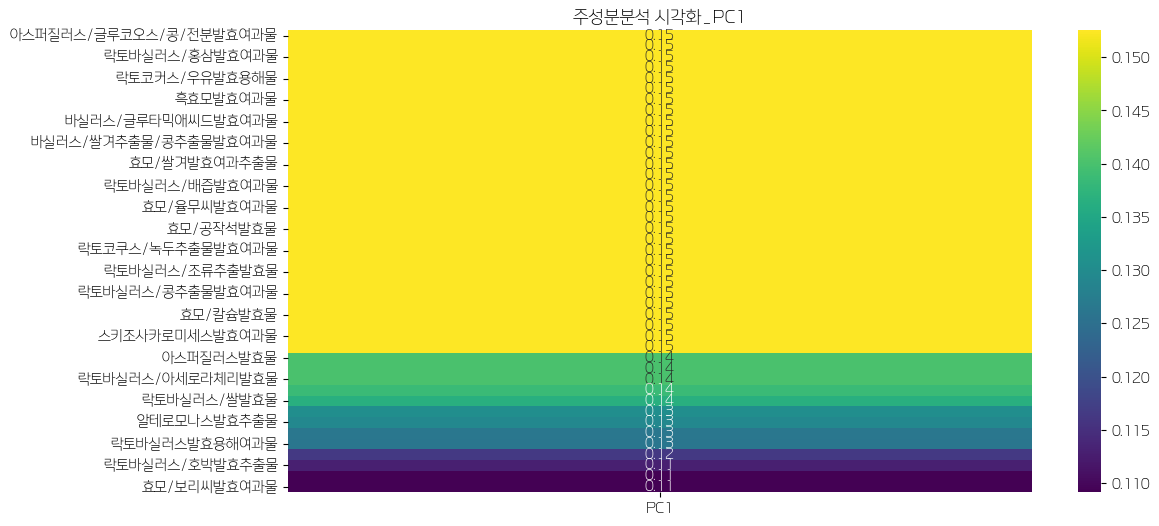

In [31]:
plt.rcParams['font.family'] = 'paybooc'
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_df_PC1, cmap='viridis', annot=True)
plt.title('주성분분석 시각화_PC1')
plt.show()

In [32]:
filtered_df_PC2 = components_df.loc['PC2']
filtered_df_PC2 = filtered_df_PC2.loc[filtered_df_PC2 > 0.1]
filtered_df_PC2 = pd.DataFrame(filtered_df_PC2).sort_values('PC2',ascending=False)
filtered_df_PC2

,PC2
센티드제라늄꽃 오일,0.164595
아티 초크잎추출물,0.164595
다이카프릴릴카보 네이트,0.164595
하이드로 제네이티드레시틴,0.164595
아크릴레이트/C10-30알킬아크릴레이트 크로스폴리머,0.164595
다이프로필렌 글라이콜,0.164595
광곽향 오일,0.164595
카프로오일스핑고신,0.164595
카프로오일 피토스핑고신,0.164595
세라마이드이오에스,0.164595


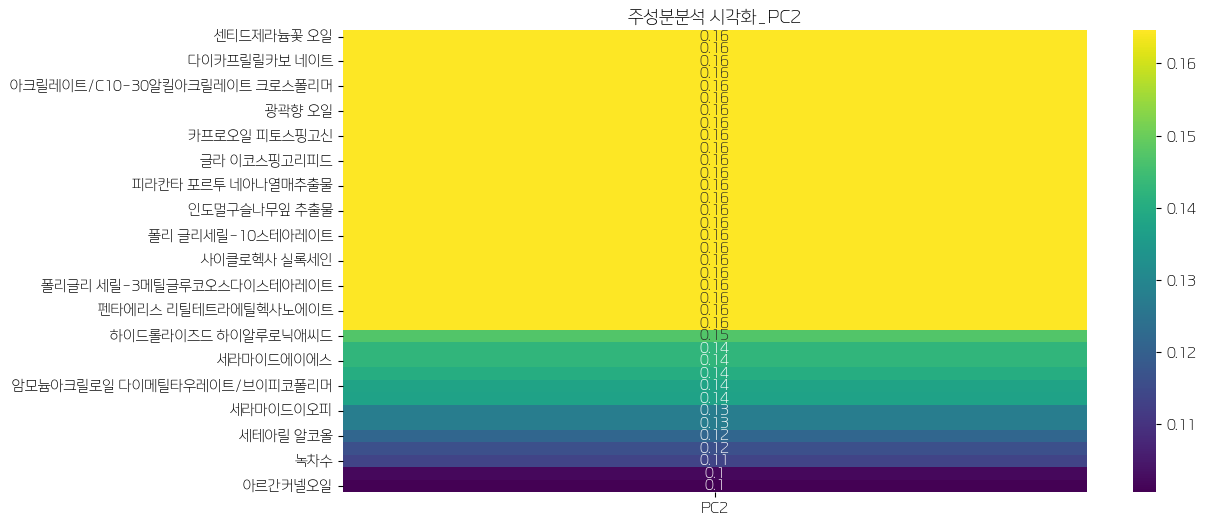

In [33]:
plt.rcParams['font.family'] = 'paybooc'
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_df_PC2, cmap='viridis', annot=True)
plt.title('주성분분석 시각화_PC2')
plt.show()

### Labels 기준으로 그룹 성격 찾아보기

In [34]:
labels

array([-1, -1, -1, ..., -1, -1, -1])

In [35]:
label_pred = {'label':labels.tolist()}
label_pred = pd.DataFrame(data = label_pred)
label_pred


,label
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
9994,-1
9995,-1
9996,-1
9997,-1


In [36]:
label_pred['label'].unique()

array([-1])

In [38]:
label_df = df_raw[['userID','user_skintype','user_trouble','prd_name']]
label_df['group'] = label_pred['label']
label_df

,userID,user_skintype,user_trouble,prd_name,group
0,F0002,건성,민감성/아토피,"아임쏘리포마이스킨 릴렉싱 앰플, 에이클리어 스팟 포 페이스 세럼, 1025 독도 토...",-1
1,F0003,복합성,주름/탄력,"하이드라메모리 세럼, 멀티-펩타이드 + 카퍼 펩타이즈 1% 세럼, 크림스킨, 포 맨...",-1
2,F0004,중성,잡티/미백/홍조/다크서클,"아하 7 화이트헤드 파워 리퀴드, 레티놀 흔적 리페어 앰플, 1번 진정 맑게담은 청...",-1
3,F0005,건성,각질,"파이브 플라워 다크스팟 클리어링 세럼, 브링그린 토닝비타20%빛세럼25mL, 화이트...",-1
4,F0006,중성,트러블,"로얄 블랙 스네일 퍼스트 에센스, 모링가 타이트닝 포어 세럼, 레드수딩 시카 밸런스...",-1
...,...,...,...,...,...
9994,M9986,민감성,각질,"레드블레미쉬 클리어 수딩 액티브 에센스, 뮤제너 피토 수딩 앰플 대용량 기획, 다이...",-1
9995,M9991,지성,트러블,"솔루션 10%, 레티놀 0.5% 인 스쿠알란, 1025 독도 토너, 레드 블레미쉬 ...",-1
9996,M9992,민감성,잡티/미백/홍조/다크서클,"라운드랩 1025 독도 앰플 45g, 온리 포 맨 올인원에센스, 더모이스처 배리어 ...",-1
9997,M9993,건성,잡티/미백/홍조/다크서클,"에이지알 글루타치온 글로우 앰플, 아쿠아 이온 플라즈마 수분 앰플, 하이드라비오 토...",-1


In [39]:
label_df.groupby('group').count()

,userID,user_skintype,user_trouble,prd_name
group,,,,
-1,9999,9999,9999,9999


### PCA 후 DBScan 알고리즘 결론: -1(노이즈)의 비율이 높아 적절치 않음

## 3.추가 전처리 : MCA

In [40]:
import prince

In [41]:
df_target

,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성,user_trouble_각질,user_trouble_민감성/아토피,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,user_trouble_주름/탄력,...,글리세릴이소스테아레이트,에스에이치-올리 고펩타이드-1,로우스 위트블루베리추출물,솔비탄세스퀴올리에이 트,피이지-60 하이드로제네이티드캐스터오일,클로페네 신,마누카잎추출물,트라이펩타이드-3,아세틸옥타펩타이드-3,트라이펩타이드-2
0,2.021376,-0.494086,-0.496748,-0.507054,-0.507365,-0.446972,2.228450,-0.448582,-0.451153,-0.445361,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566
1,-0.494712,-0.494086,2.013095,-0.507054,-0.507365,-0.446972,-0.448742,-0.448582,-0.451153,2.245371,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566
2,-0.494712,-0.494086,-0.496748,1.972178,-0.507365,-0.446972,-0.448742,-0.448582,2.216544,-0.445361,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566
3,2.021376,-0.494086,-0.496748,-0.507054,-0.507365,2.237276,-0.448742,-0.448582,-0.451153,-0.445361,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566
4,-0.494712,-0.494086,-0.496748,1.972178,-0.507365,-0.446972,-0.448742,-0.448582,-0.451153,-0.445361,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-0.494712,2.023939,-0.496748,-0.507054,-0.507365,2.237276,-0.448742,-0.448582,-0.451153,-0.445361,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566
9995,-0.494712,-0.494086,-0.496748,-0.507054,1.970967,-0.446972,-0.448742,-0.448582,-0.451153,-0.445361,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566
9996,-0.494712,2.023939,-0.496748,-0.507054,-0.507365,-0.446972,-0.448742,-0.448582,2.216544,-0.445361,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566
9997,2.021376,-0.494086,-0.496748,-0.507054,-0.507365,-0.446972,-0.448742,-0.448582,2.216544,-0.445361,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566


In [42]:
mca = prince.MCA(n_components=1774)  # 원하는 최대 주성분 개수 설정
mca.fit(df_target)

MCA(n_components=1774)

### MCA 차원 축소 후 설명력 확인

In [43]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.024,1.47%,1.47%
1,0.020,1.23%,2.71%
2,0.015,0.92%,3.63%
3,0.014,0.88%,4.51%
4,0.014,0.85%,5.35%
...,...,...,...
1769,0.000,0.00%,100.00%
1770,0.000,0.00%,100.00%
1771,0.000,0.00%,100.00%


In [44]:
mca.eigenvalues_summary.to_csv('./data/03.머신러닝_02클러스터링_DBSCAN_mca_설명력확인.csv',index=False)

In [45]:
mca_summary_all = pd.read_csv('./data/03.머신러닝_02클러스터링_DBSCAN_mca_설명력확인.csv')
mca_summary_all

,eigenvalue,% of variance,% of variance (cumulative)
0,0.024,1.47%,1.47%
1,0.020,1.23%,2.71%
2,0.015,0.92%,3.63%
3,0.014,0.88%,4.51%
4,0.014,0.85%,5.35%
...,...,...,...
1769,0.000,0.00%,100.00%
1770,0.000,0.00%,100.00%
1771,0.000,0.00%,100.00%
1772,0.000,0.00%,100.00%


In [46]:
# 70% : 326개
mca_summary_all[326:327]

,eigenvalue,% of variance,% of variance (cumulative)
326,0.001,0.07%,69.40%


In [47]:
# 80% : 519개
mca_summary_all[519:520]

,eigenvalue,% of variance,% of variance (cumulative)
519,0.001,0.04%,79.50%


In [48]:
# 90% : 796개
mca_summary_all[796:797]

,eigenvalue,% of variance,% of variance (cumulative)
796,0.001,0.03%,89.54%


### 70% 설명 가능한 수로 MCA 축소 후 DBscan

In [49]:
# 데이터프레임 df에 범주형 데이터가 있다고 가정
mca = prince.MCA(n_components=326)  # 원하는 최대 주성분 개수 설정
mca.fit(df_target)

MCA(n_components=326)

In [50]:
df_mca = mca.row_coordinates(df_target)
df_mca

,0,1,2,3,4,5,6,7,8,9,...,316,317,318,319,320,321,322,323,324,325
0,-0.032166,-0.005167,-0.013420,-0.002692,-0.007440,-0.003417,0.050824,-0.046683,0.030380,-0.047943,...,-0.024479,0.003916,0.013150,0.013981,-0.005250,0.020018,0.009586,0.005712,-0.029715,-0.043253
1,-0.027632,-0.031278,-0.031451,-0.004202,-0.015182,0.091050,0.068730,-0.049665,-0.022188,-0.014226,...,-0.005314,-0.004731,0.016658,0.002641,-0.005624,-0.004888,-0.020620,0.008799,-0.006821,0.011336
2,-0.032759,-0.049022,-0.042071,-0.030757,0.003901,-0.070332,0.017845,-0.018889,0.025888,-0.035773,...,0.002674,0.016342,0.000837,0.002859,0.024755,-0.007521,-0.001628,-0.024645,0.025927,0.006294
3,-0.033870,-0.022250,-0.033640,0.007913,-0.014304,0.030503,-0.057611,0.003126,0.054170,0.006180,...,0.018788,-0.041077,-0.006971,0.005346,-0.011715,-0.028314,-0.047520,0.002850,0.010396,-0.015042
4,-0.032100,-0.045374,-0.037718,-0.011116,-0.007123,-0.004955,0.012381,-0.001725,0.036528,-0.060504,...,0.088154,0.012348,0.068494,0.000388,-0.020022,-0.006840,0.000060,-0.077909,0.004932,0.044823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-0.034896,-0.014485,-0.036240,-0.033601,0.001190,-0.094824,0.044887,-0.174364,-0.236656,0.212410,...,0.002812,0.025503,-0.063891,0.000151,-0.008339,-0.038329,-0.021900,-0.031183,0.013587,0.074338
9995,-0.037632,-0.040249,-0.029048,-0.042091,0.010169,-0.106635,0.045159,-0.041322,0.027241,-0.024623,...,-0.030509,0.006595,-0.003160,-0.016736,-0.006875,-0.011344,-0.000123,-0.005270,-0.008718,-0.002066
9996,0.027088,-0.077609,0.990434,-0.709455,0.426098,0.222356,-0.108762,0.023541,0.013328,-0.047306,...,0.013387,-0.018926,0.001708,0.013932,0.003136,-0.002150,-0.001358,-0.046856,0.009967,0.002958
9997,-0.027203,-0.033426,-0.028773,-0.026862,-0.007373,-0.051081,-0.014715,-0.010593,0.040608,-0.043447,...,0.021654,-0.004914,0.003951,-0.000068,-0.000367,0.000331,0.030439,-0.019120,0.016660,-0.014919


In [51]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_mca)

dbscan = DBSCAN(eps=0.1, min_samples=5)
labels = dbscan.fit_predict(df_target)

# 군집 레이블을 확인합니다.
print("군집 레이블:", labels)

군집 레이블: [-1 -1 -1 ... -1 -1 -1]


In [53]:
label_pred = {'label':labels.tolist()}
label_pred = pd.DataFrame(data = label_pred)
label_df_mca = df_raw[['userID','user_skintype','user_trouble','prd_name']]
label_df_mca['group'] = label_pred['label']
label_df_mca

,userID,user_skintype,user_trouble,prd_name,group
0,F0002,건성,민감성/아토피,"아임쏘리포마이스킨 릴렉싱 앰플, 에이클리어 스팟 포 페이스 세럼, 1025 독도 토...",-1
1,F0003,복합성,주름/탄력,"하이드라메모리 세럼, 멀티-펩타이드 + 카퍼 펩타이즈 1% 세럼, 크림스킨, 포 맨...",-1
2,F0004,중성,잡티/미백/홍조/다크서클,"아하 7 화이트헤드 파워 리퀴드, 레티놀 흔적 리페어 앰플, 1번 진정 맑게담은 청...",-1
3,F0005,건성,각질,"파이브 플라워 다크스팟 클리어링 세럼, 브링그린 토닝비타20%빛세럼25mL, 화이트...",-1
4,F0006,중성,트러블,"로얄 블랙 스네일 퍼스트 에센스, 모링가 타이트닝 포어 세럼, 레드수딩 시카 밸런스...",-1
...,...,...,...,...,...
9994,M9986,민감성,각질,"레드블레미쉬 클리어 수딩 액티브 에센스, 뮤제너 피토 수딩 앰플 대용량 기획, 다이...",-1
9995,M9991,지성,트러블,"솔루션 10%, 레티놀 0.5% 인 스쿠알란, 1025 독도 토너, 레드 블레미쉬 ...",-1
9996,M9992,민감성,잡티/미백/홍조/다크서클,"라운드랩 1025 독도 앰플 45g, 온리 포 맨 올인원에센스, 더모이스처 배리어 ...",-1
9997,M9993,건성,잡티/미백/홍조/다크서클,"에이지알 글루타치온 글로우 앰플, 아쿠아 이온 플라즈마 수분 앰플, 하이드라비오 토...",-1


In [54]:
label_df_mca['group'].unique()

array([-1])

### 80% 설명 가능한 수로 MCA 축소 후 DBscan

In [55]:
# 데이터프레임 df에 범주형 데이터가 있다고 가정
mca = prince.MCA(n_components=519)  # 원하는 최대 주성분 개수 설정
mca.fit(df_target)

MCA(n_components=519)

In [56]:
df_mca = mca.row_coordinates(df_target)
df_mca

,0,1,2,3,4,5,6,7,8,9,...,509,510,511,512,513,514,515,516,517,518
0,-0.032166,-0.005167,-0.013420,-0.002692,-0.007440,-0.003417,0.050824,-0.046683,0.030380,-0.047943,...,-0.024234,-0.023463,0.012204,0.005189,-0.018386,-0.011856,-0.018212,0.014040,0.004409,-0.017154
1,-0.027632,-0.031278,-0.031451,-0.004202,-0.015182,0.091050,0.068730,-0.049665,-0.022188,-0.014226,...,0.021162,-0.018166,0.006501,0.018344,0.012270,-0.044217,-0.020894,-0.033516,0.021023,0.000815
2,-0.032759,-0.049022,-0.042071,-0.030757,0.003901,-0.070332,0.017845,-0.018889,0.025888,-0.035773,...,0.013390,0.004325,0.006755,0.007872,0.009468,0.006274,0.041045,-0.016451,0.006668,0.016371
3,-0.033870,-0.022250,-0.033640,0.007913,-0.014304,0.030503,-0.057611,0.003126,0.054170,0.006180,...,-0.013805,-0.004305,0.001781,0.008839,-0.004883,-0.000145,0.025711,0.003777,-0.045158,0.017196
4,-0.032100,-0.045374,-0.037718,-0.011116,-0.007123,-0.004955,0.012381,-0.001725,0.036528,-0.060504,...,-0.001824,0.000918,0.016324,0.000561,0.031167,0.000160,0.026556,-0.001145,0.000572,-0.001970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-0.034896,-0.014485,-0.036240,-0.033601,0.001190,-0.094824,0.044887,-0.174364,-0.236656,0.212410,...,0.006551,-0.044744,0.016522,0.015377,-0.002636,-0.040095,0.025952,0.003216,-0.009928,-0.014235
9995,-0.037632,-0.040249,-0.029048,-0.042091,0.010169,-0.106635,0.045159,-0.041322,0.027241,-0.024623,...,-0.015240,0.004048,-0.006634,0.007652,0.009847,0.014522,0.009542,0.012209,0.001595,-0.000751
9996,0.027088,-0.077609,0.990434,-0.709455,0.426098,0.222356,-0.108762,0.023541,0.013328,-0.047306,...,-0.032824,-0.030757,-0.006968,0.015673,-0.020581,0.003587,-0.009185,0.023289,-0.026343,-0.009029
9997,-0.027203,-0.033426,-0.028773,-0.026862,-0.007373,-0.051081,-0.014715,-0.010593,0.040608,-0.043447,...,-0.035096,-0.013098,-0.005362,-0.011299,-0.016733,0.011882,0.007368,0.019710,0.019653,0.007610


In [57]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_mca)

dbscan = DBSCAN(eps=0.1, min_samples=500)
labels = dbscan.fit_predict(df_target)

# 군집 레이블을 확인합니다.
print("군집 레이블:", labels)

군집 레이블: [-1 -1 -1 ... -1 -1 -1]


In [58]:
label_pred = {'label':labels.tolist()}
label_pred = pd.DataFrame(data = label_pred)
label_df_mca = df_raw[['userID','user_skintype','user_trouble','prd_name']]
label_df_mca['group'] = label_pred['label']
label_df_mca

,userID,user_skintype,user_trouble,prd_name,group
0,F0002,건성,민감성/아토피,"아임쏘리포마이스킨 릴렉싱 앰플, 에이클리어 스팟 포 페이스 세럼, 1025 독도 토...",-1
1,F0003,복합성,주름/탄력,"하이드라메모리 세럼, 멀티-펩타이드 + 카퍼 펩타이즈 1% 세럼, 크림스킨, 포 맨...",-1
2,F0004,중성,잡티/미백/홍조/다크서클,"아하 7 화이트헤드 파워 리퀴드, 레티놀 흔적 리페어 앰플, 1번 진정 맑게담은 청...",-1
3,F0005,건성,각질,"파이브 플라워 다크스팟 클리어링 세럼, 브링그린 토닝비타20%빛세럼25mL, 화이트...",-1
4,F0006,중성,트러블,"로얄 블랙 스네일 퍼스트 에센스, 모링가 타이트닝 포어 세럼, 레드수딩 시카 밸런스...",-1
...,...,...,...,...,...
9994,M9986,민감성,각질,"레드블레미쉬 클리어 수딩 액티브 에센스, 뮤제너 피토 수딩 앰플 대용량 기획, 다이...",-1
9995,M9991,지성,트러블,"솔루션 10%, 레티놀 0.5% 인 스쿠알란, 1025 독도 토너, 레드 블레미쉬 ...",-1
9996,M9992,민감성,잡티/미백/홍조/다크서클,"라운드랩 1025 독도 앰플 45g, 온리 포 맨 올인원에센스, 더모이스처 배리어 ...",-1
9997,M9993,건성,잡티/미백/홍조/다크서클,"에이지알 글루타치온 글로우 앰플, 아쿠아 이온 플라즈마 수분 앰플, 하이드라비오 토...",-1


In [59]:
label_df_mca['group'].unique()

array([-1])

### 90% 설명 가능한 수로 MCA 축소 후 DBscan

In [60]:
# 데이터프레임 df에 범주형 데이터가 있다고 가정
mca = prince.MCA(n_components=326)  # 원하는 최대 주성분 개수 설정
mca.fit(df_target)

MCA(n_components=326)

In [61]:
df_mca = mca.row_coordinates(df_target)
df_mca

,0,1,2,3,4,5,6,7,8,9,...,316,317,318,319,320,321,322,323,324,325
0,-0.032166,-0.005167,-0.013420,-0.002692,-0.007440,-0.003417,0.050824,-0.046683,0.030380,-0.047943,...,0.010218,0.005468,0.021010,0.005962,0.030402,-0.027677,-0.025508,-0.010389,0.024299,0.012838
1,-0.027632,-0.031278,-0.031451,-0.004202,-0.015182,0.091050,0.068730,-0.049665,-0.022188,-0.014226,...,0.005195,-0.007373,0.013991,-0.001942,0.024651,-0.021870,0.010035,0.025668,0.011957,-0.014852
2,-0.032759,-0.049022,-0.042071,-0.030757,0.003901,-0.070332,0.017845,-0.018889,0.025888,-0.035773,...,0.007028,0.002111,0.002654,0.022738,0.005905,0.014023,-0.005177,0.010464,-0.027503,0.006426
3,-0.033870,-0.022250,-0.033640,0.007913,-0.014304,0.030503,-0.057611,0.003126,0.054170,0.006180,...,0.000856,0.019499,0.012371,-0.010710,-0.010395,-0.020913,0.030933,-0.004625,-0.024427,-0.000138
4,-0.032100,-0.045374,-0.037718,-0.011116,-0.007123,-0.004955,0.012381,-0.001725,0.036528,-0.060504,...,0.001141,0.023612,-0.023309,-0.032213,0.017399,0.009154,-0.036239,-0.038361,-0.078819,0.010382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-0.034896,-0.014485,-0.036240,-0.033601,0.001190,-0.094824,0.044887,-0.174364,-0.236656,0.212410,...,0.041929,0.020742,0.017470,-0.048234,-0.020942,0.049603,-0.027308,-0.003910,-0.032921,-0.006892
9995,-0.037632,-0.040249,-0.029048,-0.042091,0.010169,-0.106635,0.045159,-0.041322,0.027241,-0.024623,...,-0.001442,-0.013385,0.004904,0.012140,-0.014074,-0.002253,-0.008146,-0.019983,-0.001202,0.015893
9996,0.027088,-0.077609,0.990434,-0.709455,0.426098,0.222356,-0.108762,0.023541,0.013328,-0.047306,...,0.009243,0.013463,-0.027965,-0.003127,-0.025794,0.007560,0.000058,-0.002322,-0.025213,0.018867
9997,-0.027203,-0.033426,-0.028773,-0.026862,-0.007373,-0.051081,-0.014715,-0.010593,0.040608,-0.043447,...,0.021088,0.009115,-0.039999,0.003368,0.006882,-0.025265,-0.013840,-0.006316,0.007326,-0.012201


In [62]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_mca)

dbscan = DBSCAN(eps=0.1, min_samples=5)
labels = dbscan.fit_predict(df_target)

# 군집 레이블을 확인합니다.
print("군집 레이블:", labels)

군집 레이블: [-1 -1 -1 ... -1 -1 -1]


In [63]:
label_pred = {'label':labels.tolist()}
label_pred = pd.DataFrame(data = label_pred)
label_df_mca = df_raw[['userID','user_skintype','user_trouble','prd_name']]
label_df_mca['group'] = label_pred['label']
label_df_mca

,userID,user_skintype,user_trouble,prd_name,group
0,F0002,건성,민감성/아토피,"아임쏘리포마이스킨 릴렉싱 앰플, 에이클리어 스팟 포 페이스 세럼, 1025 독도 토...",-1
1,F0003,복합성,주름/탄력,"하이드라메모리 세럼, 멀티-펩타이드 + 카퍼 펩타이즈 1% 세럼, 크림스킨, 포 맨...",-1
2,F0004,중성,잡티/미백/홍조/다크서클,"아하 7 화이트헤드 파워 리퀴드, 레티놀 흔적 리페어 앰플, 1번 진정 맑게담은 청...",-1
3,F0005,건성,각질,"파이브 플라워 다크스팟 클리어링 세럼, 브링그린 토닝비타20%빛세럼25mL, 화이트...",-1
4,F0006,중성,트러블,"로얄 블랙 스네일 퍼스트 에센스, 모링가 타이트닝 포어 세럼, 레드수딩 시카 밸런스...",-1
...,...,...,...,...,...
9994,M9986,민감성,각질,"레드블레미쉬 클리어 수딩 액티브 에센스, 뮤제너 피토 수딩 앰플 대용량 기획, 다이...",-1
9995,M9991,지성,트러블,"솔루션 10%, 레티놀 0.5% 인 스쿠알란, 1025 독도 토너, 레드 블레미쉬 ...",-1
9996,M9992,민감성,잡티/미백/홍조/다크서클,"라운드랩 1025 독도 앰플 45g, 온리 포 맨 올인원에센스, 더모이스처 배리어 ...",-1
9997,M9993,건성,잡티/미백/홍조/다크서클,"에이지알 글루타치온 글로우 앰플, 아쿠아 이온 플라즈마 수분 앰플, 하이드라비오 토...",-1


In [64]:
label_df_mca['group'].unique()

array([-1])

### MCA 요소 확인

In [65]:
df_mca = mca.row_coordinates(df_target)
df_mca

,0,1,2,3,4,5,6,7,8,9,...,316,317,318,319,320,321,322,323,324,325
0,-0.032166,-0.005167,-0.013420,-0.002692,-0.007440,-0.003417,0.050824,-0.046683,0.030380,-0.047943,...,0.010218,0.005468,0.021010,0.005962,0.030402,-0.027677,-0.025508,-0.010389,0.024299,0.012838
1,-0.027632,-0.031278,-0.031451,-0.004202,-0.015182,0.091050,0.068730,-0.049665,-0.022188,-0.014226,...,0.005195,-0.007373,0.013991,-0.001942,0.024651,-0.021870,0.010035,0.025668,0.011957,-0.014852
2,-0.032759,-0.049022,-0.042071,-0.030757,0.003901,-0.070332,0.017845,-0.018889,0.025888,-0.035773,...,0.007028,0.002111,0.002654,0.022738,0.005905,0.014023,-0.005177,0.010464,-0.027503,0.006426
3,-0.033870,-0.022250,-0.033640,0.007913,-0.014304,0.030503,-0.057611,0.003126,0.054170,0.006180,...,0.000856,0.019499,0.012371,-0.010710,-0.010395,-0.020913,0.030933,-0.004625,-0.024427,-0.000138
4,-0.032100,-0.045374,-0.037718,-0.011116,-0.007123,-0.004955,0.012381,-0.001725,0.036528,-0.060504,...,0.001141,0.023612,-0.023309,-0.032213,0.017399,0.009154,-0.036239,-0.038361,-0.078819,0.010382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-0.034896,-0.014485,-0.036240,-0.033601,0.001190,-0.094824,0.044887,-0.174364,-0.236656,0.212410,...,0.041929,0.020742,0.017470,-0.048234,-0.020942,0.049603,-0.027308,-0.003910,-0.032921,-0.006892
9995,-0.037632,-0.040249,-0.029048,-0.042091,0.010169,-0.106635,0.045159,-0.041322,0.027241,-0.024623,...,-0.001442,-0.013385,0.004904,0.012140,-0.014074,-0.002253,-0.008146,-0.019983,-0.001202,0.015893
9996,0.027088,-0.077609,0.990434,-0.709455,0.426098,0.222356,-0.108762,0.023541,0.013328,-0.047306,...,0.009243,0.013463,-0.027965,-0.003127,-0.025794,0.007560,0.000058,-0.002322,-0.025213,0.018867
9997,-0.027203,-0.033426,-0.028773,-0.026862,-0.007373,-0.051081,-0.014715,-0.010593,0.040608,-0.043447,...,0.021088,0.009115,-0.039999,0.003368,0.006882,-0.025265,-0.013840,-0.006316,0.007326,-0.012201


In [66]:
a = mca.column_contributions_
a

,0,1,2,3,4,5,6,7,8,9,...,316,317,318,319,320,321,322,323,324,325
user_skintype_건성_-0.49471248787719696,3.829809e-07,4.635125e-08,1.069060e-06,1.538485e-06,1.268180e-06,1.094625e-06,3.674830e-07,2.350303e-07,2.783521e-06,1.434861e-06,...,0.000083,5.156279e-07,0.000038,7.725519e-05,2.973007e-05,1.410114e-04,0.000040,2.189381e-06,2.666330e-06,5.603603e-05
user_skintype_건성_2.0213761012805307,1.564845e-06,1.893894e-07,4.368137e-06,6.286188e-06,5.181734e-06,4.472593e-06,1.501521e-06,9.603246e-07,1.137336e-05,5.862788e-06,...,0.000340,2.106836e-06,0.000154,3.156617e-04,1.214759e-04,5.761672e-04,0.000162,8.945726e-06,1.089452e-05,2.289611e-04
user_skintype_민감성_-0.4940859648375938,1.612194e-08,1.838760e-09,2.740631e-08,1.673523e-06,3.239106e-06,1.685795e-07,2.291672e-07,5.489301e-07,1.002042e-07,5.724878e-07,...,0.000063,7.639805e-05,0.000286,1.802125e-04,5.491544e-05,1.149960e-04,0.000137,1.247558e-04,7.566011e-05,4.800840e-05
user_skintype_민감성_2.0239392963301435,6.604078e-08,7.532170e-09,1.122653e-07,6.855302e-06,1.326845e-05,6.905575e-07,9.387445e-07,2.248599e-06,4.104694e-07,2.345099e-06,...,0.000257,3.129517e-04,0.001170,7.382101e-04,2.249518e-04,4.710617e-04,0.000562,5.110409e-04,3.099288e-04,1.966583e-04
user_skintype_복합성_-0.49674752615202294,2.844894e-07,1.327221e-08,1.485967e-08,1.418185e-06,3.946670e-07,9.812497e-07,7.666340e-07,3.912677e-07,3.398518e-06,2.578609e-07,...,0.000034,1.949446e-04,0.000348,1.412410e-05,2.215777e-07,2.147544e-04,0.000004,2.373886e-04,4.807070e-04,1.346721e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
트라이펩타이드-3_11.825015260687529,2.088968e-06,5.477532e-07,1.429360e-05,6.708450e-08,1.288741e-06,5.493320e-06,1.215150e-05,1.521576e-05,1.054652e-04,8.388425e-06,...,0.000167,1.091347e-05,0.000331,1.472501e-06,2.828611e-04,9.437737e-06,0.000181,1.161178e-04,2.818634e-06,6.596353e-05
아세틸옥타펩타이드-3_-0.08456648705769687,1.493923e-08,3.917252e-09,1.022206e-07,4.797542e-10,9.216417e-09,3.928543e-08,8.690136e-08,1.088154e-07,7.542332e-07,5.998975e-08,...,0.000001,7.804755e-08,0.000002,1.053058e-08,2.022879e-06,6.749389e-08,0.000001,8.304153e-07,2.015744e-08,4.717376e-07
아세틸옥타펩타이드-3_11.825015260687529,2.088968e-06,5.477532e-07,1.429360e-05,6.708450e-08,1.288741e-06,5.493320e-06,1.215150e-05,1.521576e-05,1.054652e-04,8.388425e-06,...,0.000167,1.091347e-05,0.000331,1.472501e-06,2.828611e-04,9.437737e-06,0.000181,1.161178e-04,2.818634e-06,6.596353e-05
트라이펩타이드-2_-0.08456648705769687,1.493923e-08,3.917252e-09,1.022206e-07,4.797542e-10,9.216417e-09,3.928543e-08,8.690136e-08,1.088154e-07,7.542332e-07,5.998975e-08,...,0.000001,7.804755e-08,0.000002,1.053058e-08,2.022879e-06,6.749389e-08,0.000001,8.304153e-07,2.015744e-08,4.717376e-07


In [67]:
a[0].sort_values(ascending=False)[:10]

아스퍼질러스/글루코오스/콩/전분발효여과물_5.755543402970846    0.022495
락토바실러스/홍삼발효여과물_5.755543402970846            0.022495
효모/공작석발효물_5.755543402970846                 0.022495
효모/슈가캘프발효물_5.755543402970846                0.022495
효모/콩단백질발효물_5.755543402970846                0.022495
효모/율무씨발효여과물_5.755543402970846               0.022495
락토바실러스/여바산타발효추출물_5.755543402970846          0.022495
락토바실러스/부레옥잠발효물_5.755543402970846            0.022495
락토바실러스/히비스커스꽃발효여과물_5.755543402970846        0.022495
피키아발효용해여과물_5.755543402970846                0.022495
Name: 0, dtype: float64